In [26]:
#  The following is a tutorial for plotting color magnitude diagrams for galaxy
#  groups using simple python code, and Jupyter notebooks.


#  First, you have to import the libraries that you will need to run your code. The 
#  three main libraries you will need is numpy and pyplot from matplotlib.
#  If you are reading in your data through .ascii or .fits files, you will need 
#  to import ascii or fits respectively from astropy.io.  As an example, I have 
#  the following code to import what I will need:

import numpy as np
import math
from numpy  import array
from matplotlib import pyplot as plt
from astropy.io import fits 

In [27]:
# To open the main catalog from GOGreen you will need to do the following:

data = fits.open('GOGREEN_goodz_zcat_v1.0.fits')

# To see what you are working with I did the following commands:

print(data[1])
data.info()
data[1].columns

Filename: GOGREEN_goodz_zcat_v1.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     90   1550R x 25C   [15A, 1J, 1J, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1E, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   


ColDefs(
    name = 'Cluster'; format = '15A'; disp = 'A15'
    name = 'PHOTID'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'SPECID'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'EXTVER'; format = '1I'; null = -32767; disp = 'I11'
    name = 'RA(J2000)'; format = '1E'; unit = 'deg'; disp = 'G15.7'
    name = 'DEC(J2000)'; format = '1E'; unit = 'deg'; disp = 'G15.7'
    name = 'ZMAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'EZMAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'SNR_8500_VAR'; format = '1E'; disp = 'G15.7'
    name = 'SNR_8500_RMS'; format = '1E'; disp = 'G15.7'
    name = 'IRAC1MAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'EIRAC1MAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'OBJClass'; format = '1I'; null = -32767; disp = 'I11'
    name = 'Redshift'; format = '1E'; disp = 'G15.7'
    name = 'Redshift_Quality'; format = '1I'; null = -32767; disp = 'I11'
    name = 'Mass'; format = '1E'; disp = 'G15.7'
    name = 'EMa

In [28]:
# Need to name the catalog data, so you can call it later:

catdata = data[1].data

# Also I used this command to see what every column was in the data set:

catdata[:]

FITS_rec([('COSMOS-125', 81258, 114081258,   1, 150.59691,  2.1294534, 22.86036 , 0.04703981, 4.7547464, 3.2849386, 22.017117, 0.13531868, 1, 0.72447, 3,         nan,         nan,       nan,        nan,       nan,       nan,         nan,        nan, -1., -1.),
          ('COSMOS-125', 81508, 114081508,   2, 150.6097 ,  2.134149 , 23.310665, 0.07754201, 2.862871 , 1.8293086, 21.501059, 0.10681412, 1, 1.13177, 4,  10.381105 ,  1.1289968 , 1.2377292, 0.08545634, 52.396397, 9906.903 ,  0.06462065, 42252.883 , -1., -1.),
          ('COSMOS-125', 81650, 114081650,   3, 150.63072,  2.1355174, 23.217016, 0.06410974, 3.3562014, 2.1561184, 21.13615 , 0.08978042, 1, 1.68603, 4,         nan,         nan,       nan,        nan,       nan,       nan,         nan,        nan, -1., -1.),
          ...,
          ('SpARCS1638',  1042, 212060893, 188, 249.72237, 40.63543  , 22.974   , 0.        , 2.2042015, 1.1372991, 22.409   , 0.        , 4, 1.189  , 4,   2.4813666,  0.24813667, 0.9162151, 0.09377316,

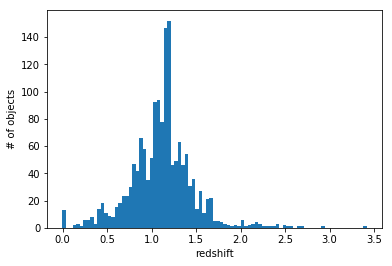

In [29]:
# The first thing I had to do was create a spectroscopic redshift histogram from the spectroscopic catalog for the whole GoGreen survey. 
# To do this, do the following:

nbins = int((3.5 - 0) / 0.04)
hist = plt.hist(z,bins=nbins)
hist = plt.xlabel('redshift')
hist = plt.ylabel('# of objects')
plt.show()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


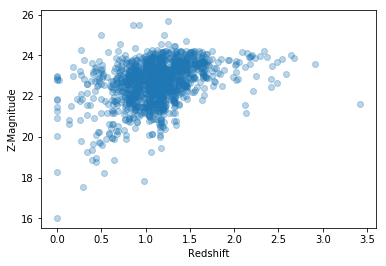

In [30]:
# To plot the z-magnitude against the redshift of the whole survey, do the following:

igoodz = np.where(catdata['ZMAG_TOTAL']<40.)
zmagVSred = plt.scatter(catdata['Redshift'][igoodz],catdata['ZMAG_TOTAL'][igoodz], alpha = 0.3)
zmagVSred = plt.xlabel('Redshift')
zmagVSred = plt.ylabel('Z-Magnitude')
plt.show()


In [31]:
# To do a spectroscopic redshift histogram for just a couple of clusters individually you
# need to choose a specific cluster and name it. Then need to do a np.where command to find it within the catalog.

cluststr = 'SPT2106'
i = np.where(catdata['cluster']==cluststr)
print(catdata['redshift'][i])

[0.8155  0.77859 1.1415  1.13231 1.13361 1.12039 1.47843 0.77988 1.11367
 1.12796 1.1282  1.18861 1.0609  1.11231 1.13886 1.11722 1.11325 1.13099
 1.12505 1.12339 1.11853 1.11167 0.90733 1.49958 1.13826 0.92046 1.10992
 1.11177 1.12959 1.34122 1.12031 1.1359  1.12536 1.13064 1.25633 1.13473
 1.42245 1.14461 0.97092 1.19089 1.11795 1.62728 0.78244 1.12337 1.34359
 0.86751 1.13194 1.13862 0.49081 1.02119 1.28927 1.28921 1.06627 1.12182
 2.13421]


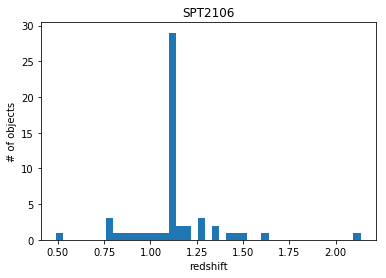

In [32]:
# Then like the whole survey histrogram that was done earlier, you can do
# the same commands again, but for just that cluster.

nbins = int((1.75 - 0) / 0.04)
hist = plt.hist(catdata['redshift'][i],bins=nbins)
hist = plt.xlabel('redshift')
hist = plt.ylabel('# of objects')
hist = plt.title(cluststr)
plt.show()

[1.09322 0.61419 1.25972 0.90242 1.01831 1.63637 0.87167 0.75005 0.79594
 1.20616 0.87885 1.19627 0.84853 1.19764 0.80176 1.25983 0.99962 1.09785
 1.43697 0.88128 0.88181 0.98314 0.87997 0.87723 1.14603 1.43743 1.43885
 0.92197 0.81594 1.14485 1.19469 1.19388 1.19659 1.04338 1.15923 1.14312]


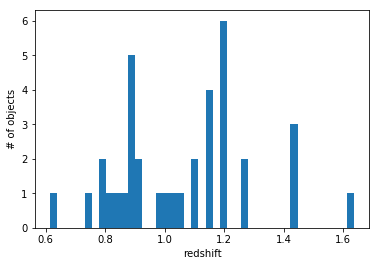

In [33]:
# You can also find another cluster by using indices and then plotting it accordingly:

print(catdata['redshift'][27:63])

hist = plt.hist(catdata['redshift'][27:63],bins=nbins)
hist = plt.xlabel('redshift')
hist = plt.ylabel('# of objects')
plt.show()

In [45]:
# I spent a lot of time trying to join tables because the information for the GoGreen survey is in different directories
# and the names don't match up. I never got astropy.table to work, so I ended up making my own function

import catread
zcat = Specz_photmatched['spec_z']
ggfile = fits.open('/Users/taylorplattner/Work/GOGREEN.fits')
ggdat = ggfile[1].data
clname_spec = ['SPT0205','SPT0546','SPT2106','SpARCS0035','SpARCS0219','SpARCS0335']
clname_phot = ['SPTCL-0205','SPTCL-0546','SPTCL-2106','SpARCS-0035','SpARCS-0219','SpARCS-0335']
photext = {'SPTCL-0205' : 'FOURSTARKs', 'SPTCL-0546' : 'FOURSTARKs', 'SPTCL-2106' : 'FOURSTARKs', 'SpARCS-0035' : 'HAWKIKs', 'SpARCS-0219' : 'HAWKIKs', 'SpARC-0335' : 'HAWKIKs'}
for iname in range(len(clname_spec):
        if(clname_spec[iname]==ggdat['cluster'][i]):
           print(clname_spec[iname],ggdat['Redshift'][i])
           zclust = ggdat['Redshift'][i]
            (rfcat, photext) = catread(clname_phot[iname], photext)
                   
       
   ...: for name in clname:
   ...:     for i in range(len(ggdat[‘cluster’])):
   ...:         if(name==ggdat[‘cluster’][i]):
   ...:             print(name,ggdat[‘Redshift’][i])
   ...:             zclust = ggdat[‘Redshift’][i]
            #plot

SyntaxError: invalid syntax (<ipython-input-45-bcae39456251>, line 11)